# **User Growth Accounting of Company from Weekly Active Users(WAU) Data**

**Loading the Dataset and Printing data in it**

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Loading the dataset
file_path = "./Active Users.xlsx"  # Given Weekly Active Users Excel Sheet("Active Users.xlsx")
data = pd.read_excel(file_path)

df = pd.DataFrame(data)

# The Data in the dataset
data

,w1,w2,w3,w4,w5,w6,w7,w8,w9,w10,...,w47,w48,w49,w50,w51,w52,w53,w54,w55,w56
0,fd7c28f9fd8045f2,fd7c28f9fd8045f2,fd7c28f9fd8045f2,fd7c28f9fd8045f2,fd7c28f9fd8045f2,231d91be38352d7a,306243851b716bf6,149f7dd1efe25ebc,191a909000d7123d,191a909000d7123d,...,ffedb2a5b3b4838,ffedb2a5b3b4838,fff444dcd8f9808f,ffedb2a5b3b4838,ffedb2a5b3b4838,ffedb2a5b3b4838,ffedb2a5b3b4838,fffe76c3a948cdfb,fffe76c3a948cdfb,fffe76c3a948cdfb
1,54910d2b363221e1,520443b0b8128202,a4bce0d054266d68,a4bce0d054266d68,c0bb01dbe2b2de0f,53010d4139ed029f,d1afc6d7c4661d7e,9ab44ee389767d59,91e804eb002a580d,5109246885c54360,...,ffe3d17a83edd05a,ffe3d17a83edd05a,ffedb2a5b3b4838,ffde16048235a32f,ffde16048235a32f,ffe7939306264854,ffe7939306264854,fff444dcd8f9808f,fff444dcd8f9808f,ffe7939306264854
2,520443b0b8128202,a4bce0d054266d68,7b042fcc54a45882,d98da6eaa4bb452f,7b042fcc54a45882,a4bce0d054266d68,3792a1c9395e3e2a,839d5042ee4d8988,a4bce0d054266d68,e254fb2201bf1419,...,ffde16048235a32f,ffde16048235a32f,ffde16048235a32f,ffd99d6c632283a9,ffc6c128db97ab1d,ffe3d17a83edd05a,ffb36133fb3c44e2,ffedb2a5b3b4838,ffedb2a5b3b4838,ffde16048235a32f
3,a4bce0d054266d68,d1afc6d7c4661d7e,aed9597fc6984d64,7b042fcc54a45882,c885df69f0e13074,d1afc6d7c4661d7e,7b042fcc54a45882,a4bce0d054266d68,306243851b716bf6,306243851b716bf6,...,ffb36133fb3c44e2,ffdce5869723d832,ffbafb7cc49be72,ffb36133fb3c44e2,ffb36133fb3c44e2,ffde16048235a32f,ffa8eb6c18e09543,ffe7939306264854,ffde16048235a32f,ffb94deefa8aa79f
4,3792a1c9395e3e2a,7b042fcc54a45882,407d67f50877e6f9,aed9597fc6984d64,aed9597fc6984d64,3792a1c9395e3e2a,a455b3d89d7d6a3b,306243851b716bf6,a99a477e2c336bb9,a99a477e2c336bb9,...,ff7e5bf81a779007,ffb36133fb3c44e2,ffb36133fb3c44e2,ffa96fa38b711342,ffa96fa38b711342,ffb36133fb3c44e2,ff7e5bf81a779007,ffde16048235a32f,ffb36133fb3c44e2,ffb36133fb3c44e2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Extracting unique users for each week**

In [44]:
# Extract unique users for each week
weekly_users = {f'w{i}': set(data[f'w{i}']) for i in range(1, 57)}

# weekly_users

**Calculating and Printing Metrics - New, Retained, Resurrected and Churned Users**

In [45]:
# Initializing dictionaries to store new, retained, resurrected, and churned users
new_users = {}
retained_users = {}
resurrected_users = {}
churned_users = {}
retention_rate = {}

# Calculating metrics for each week
previous_week = None
all_previous_users = set({})
for week in range(1, 57): 
    current_week = f'w{week}'
    if previous_week:
        current_users = weekly_users[current_week]
        previous_users = weekly_users[previous_week]

        # Calculating new, retained, resurrected, churned users and retention rate
        new_users[current_week] = len(current_users - previous_users - all_previous_users)
        retained_users[current_week] = len(current_users & previous_users)
        resurrected_users[current_week] = len((current_users & all_previous_users) - previous_users)
        churned_users[current_week] = len(previous_users - current_users)

        retention_rate[current_week] = retained_users[current_week] / len(previous_users) if len(previous_users) > 0 else 0
        
        all_previous_users = all_previous_users | previous_users
    
    else:
        new_users[current_week] = len(weekly_users[current_week])
        retained_users[current_week] = 0
        resurrected_users[current_week] = 0
        churned_users[current_week] = 0
    
    previous_week = current_week
    

# Storing the results in DataFrame
results = pd.DataFrame({
    'Week': [f'w{i}' for i in range(1, 57)],
    'New Users': [new_users[f'w{i}'] for i in range(1, 57)],
    'Retained Users': [retained_users[f'w{i}'] for i in range(1, 57)],
    'Resurrected Users': [resurrected_users[f'w{i}'] for i in range(1, 57)],
    'Churned Users': [churned_users[f'w{i}'] for i in range(1, 57)],
    'Retention Rate': [0] + [retention_rate[f'w{i}'] for i in range(2, 57)] # Calculation of Retention Ratio
})

# Calculating Quick Ratio
results['Quick Ratio'] = (results['New Users'] + results['Resurrected Users']) / results['Churned Users']

avg_retention_rate = sum([i for i in retention_rate.values()]) / len(retention_rate)

avg_quick_ratio = sum(results['Quick Ratio'].iloc[1:]) / results['Quick Ratio'].shape[0]
min_quick_ratio = min(results['Quick Ratio'].iloc[1:])
max_quick_ratio = max(results['Quick Ratio'].iloc[1:])

print(f"Average Rentention Rate: {avg_retention_rate * 100} %\n")
print("Average Quick Ratio: ", avg_quick_ratio, "\nMinimum Quick Ratio:", min_quick_ratio, "\nMaximum Quick Ratio:", max_quick_ratio)

results

Average Rentention Rate: 72.30139304257544 %

Average Quick Ratio:  1.044966793280212 
Minimum Quick Ratio: 0.5547675334909378 
Maximum Quick Ratio: 1.9642857142857142


,Week,New Users,Retained Users,Resurrected Users,Churned Users,Retention Rate,Quick Ratio
0,w1,1760,0,0,0,0.000000,inf
1,w2,723,932,0,828,0.529545,0.873188
2,w3,645,1001,87,654,0.604834,1.119266
3,w4,722,1170,225,563,0.675130,1.682060
4,w5,674,1395,125,722,0.658951,1.106648
5,w6,489,1480,187,714,0.674567,0.946779
6,w7,860,1488,202,668,0.690167,1.589820
7,w8,1005,1678,193,872,0.658039,1.373853
8,w9,719,1840,237,1036,0.639777,0.922780
9,w10,621,1939,262,857,0.693491,1.030338


**Generating and Visuvalising the User Growth Accounting Chart**

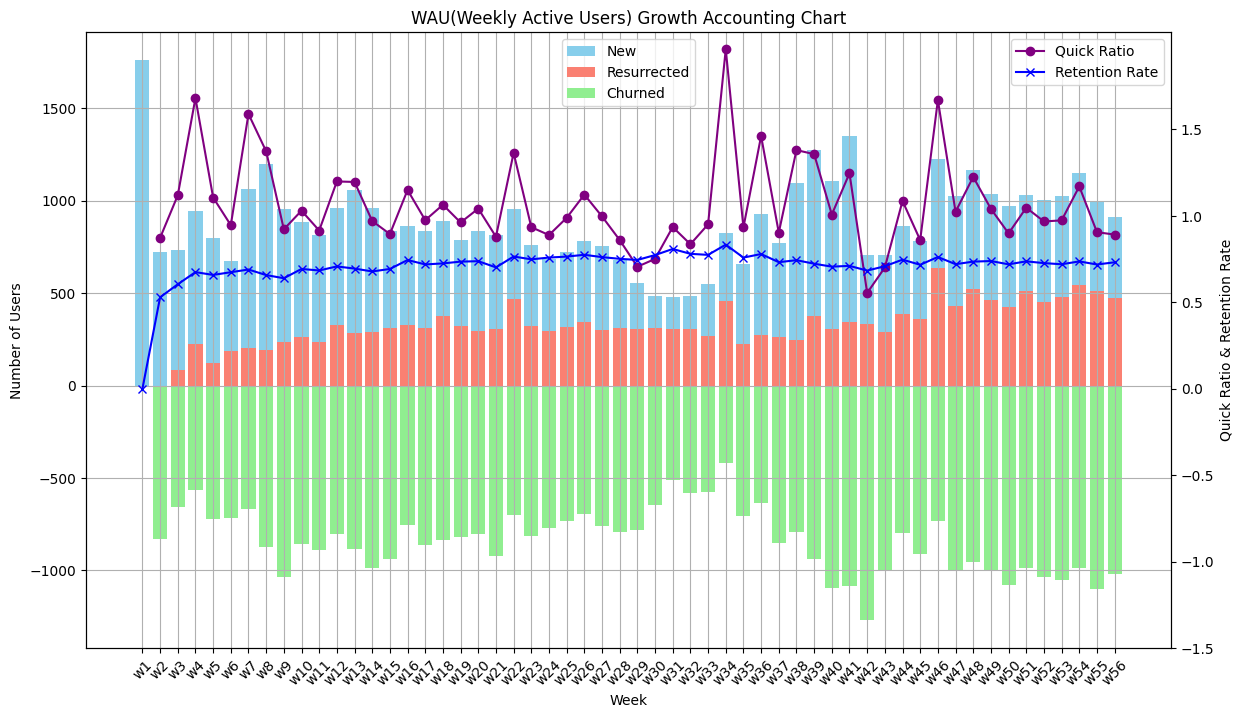

In [46]:
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plotting the bar charts for new, resurrected, and churned users
bar_width = 0.4
weeks = results['Week']
index = range(len(weeks))

ax1.bar(index, results['New Users'], label='New', color='skyblue', bottom=results['Resurrected Users'])
ax1.bar(index, results['Resurrected Users'], label='Resurrected', color='salmon')
ax1.bar(index, -results['Churned Users'], label='Churned', color='lightgreen')

# Plotting the Quick Ratio and Rentention Ratio line on the same graph with different X axis
ax2 = ax1.twinx()
ax2.plot(index, results['Quick Ratio'], label='Quick Ratio', color='purple', marker='o')
ax2.plot(index, results['Retention Rate'], label='Retention Rate', color='blue', marker='x')

# Setting X ticks values
ax1.set_xticks(index)
ax1.set_xticklabels(weeks, rotation=45)

# Adding labels and title
ax1.set_xlabel('Week')
ax1.set_ylabel('Number of Users')
ax2.set_ylabel('Quick Ratio & Retention Rate')
ax2.set_yticks([-1.5, -1, -0.5, 0, 0.5, 1, 1.5])
ax1.set_title('WAU(Weekly Active Users) Growth Accounting Chart')

# Adding legends
ax1.legend(loc='upper center')
ax2.legend(loc='upper right')

# Display the grid
ax1.grid(True)
plt.show()

**Analysis (Insights):**

The above generated Chart of Weakly Active Users(WAU) data represents "User Growth Accounting for a Company" similar to Monthly Active Users(MAU) as mentioned in article. It also gives the insights like the MAU Growth Accounting.

The insights we can observe from the above User Growth Accounting of WAU are:

1. **Retention and Churn Rate:** The average rentention rate is "72%" and so average churn rate(100% - 72%) is "28%". So, here more users are retened than the churned users. This gives the positive sign for growth of company.

2. **Quick Ratio:** Here, quick ratio is between 0.5 to 2(Approximatly). These means for every 2 new users the company is to loose 1 to 4 users as churns. We can say that the company is having drop and increase in users in a very fluctuated manner(with spikes).

**Conclusion**: Here according to comparision between (New users + Ressurcted users) and Churned users the company is not growing faster. and due to fluctuation of spikes in Quick Ratio can upgrades and degrades the growth of company based on some situations like campaigns. But, It's Retention Rate is much stable and better than chruned rate. So, majorly retention rate plays a main role to make the company to sustain and also to grow gradually. By this we can say that this company can sustain in future with a gradual growth in users.